Projeto Final do Módulo de Estatística

@author: João Baiochi

### Importação e Configuração

In [547]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib as mpl

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from scipy.stats import normaltest
from scipy.stats import pearsonr
from scipy.stats import norm, t as t_student 
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

# define colors
colors = {
    'cyan': '#1696d2',
    'gray': '#5c5859',
    'black': '#000000',
    'yellow': '#fdbf11',
    'orange': '#ca5800',
    'magenta': '#af1f6b',
    'green': '#408941',
    'red': '#a4201d'
}
#mpl.rcParams.update(mpl.rcParamsDefault) # avoid bug with plot margins on dark themes
color_palette = ['#1696d2', '#5c5859', '#fdbf11', '#af1f6b', '#408941']
sns.set()
sns.set_palette(color_palette)

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')
print(f'Seaborn: {sns.__version__}')
print(f'Statsmodels.api: {sm.__version__}')

Numpy: 1.20.3
Pandas: 1.3.4
Seaborn: 0.11.2
Statsmodels.api: 0.12.2


### Aditional Functions

In [176]:
# Quick remove outliers
# Param: data -> pandas.Series
# Return: data -> pandas.Series
def remove_outliers(data):

    q1, q3 = data.quantile(0.25), data.quantile(0.75)
    iqr = q3 - q1
    inf_limit = q1 - 1.5*iqr
    sup_limit = q3 + 1.5*iqr
    data = data[(data > inf_limit) & (data < sup_limit)]

    return data

# Descrição do Projeto

A Autoridade De Estatística das Filipinas (PSA) lidera a realização da Pesquisa de Renda e Despesa Familiar (FIES) em todo o país.  
A pesquisa, realizada a cada 3 (três) anos, tem como objetivo fornecer dados sobre renda e despesas familiares, incluindo, entre outros, níveis de consumo por item de despesa, fontes de renda em dinheiro e informações relacionadas que afetam a renda e níveis de despesas e padrões nas Filipinas.   
Dessa forma, pede-se que seja elaborado um relatório prévio com insights e análise de dados por parte de um cientista de dados.

Clique <a href='https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv'>aqui</a> para baixar o dataset.

## Visualização do Dataset

In [421]:
df = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/97fe77d1-2aec-4660-a799-c6eaccd14ea7.csv')
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [422]:
# renaming columns for easy accession
df.columns = df.columns.str.replace(' ', '_')

In [423]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total_Household_Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total_Food_Expenditure                         41544 non-null  int64 
 3   Main_Source_of_Income                          41544 non-null  object
 4   Agricultural_Household_indicator               41544 non-null  int64 
 5   Bread_and_Cereals_Expenditure                  41544 non-null  int64 
 6   Total_Rice_Expenditure                         41544 non-null  int64 
 7   Meat_Expenditure                               41544 non-null  int64 
 8   Total_Fish_and__marine_products_Expenditure    41544 non-null  int64 
 9   Fruit_Expenditure                              41544 non-null

In [424]:
null_values = df.isnull().sum()
null_values[null_values > 0]

Household_Head_Occupation         7536
Household_Head_Class_of_Worker    7536
dtype: int64

# <font color=Gold>Milestone 1

## <font color='orange'>Tarefa 1</font>
Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%.  

In [6]:
max_error = 500
conf_level = 0.95
sig_level = 1 - conf_level

In [7]:
sigma = df['Medical_Care_Expenditure'].std()
z_alpha_2 = norm.ppf(0.95 + (0.05 / 2))
z_alpha_2

1.959963984540054

In [8]:
n_min = (z_alpha_2 * sigma / max_error)**2

In [9]:
n = round(np.ceil(n_min))
n

11121

In [10]:
population_mean = df['Medical_Care_Expenditure'].mean()
sample_error = [[n,abs(df['Medical_Care_Expenditure'].sample(n, random_state=101).mean() - population_mean) ] for n in range (2, df.shape[0]+1) ]

In [11]:
n_error = pd.DataFrame(sample_error, columns=['n', 'error'])
n_error.head()

,n,error
0,2,6334.730936
1,3,5517.564269
2,4,4882.730936
3,5,5262.230936
4,6,5495.564269


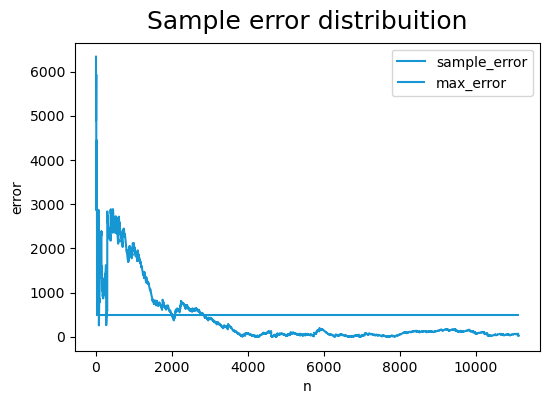

In [32]:
plt.figure(figsize=(6,4))
sns.lineplot(data=n_error.iloc[:n], x='n', y='error', label='sample_error')
plt.hlines(y=500, xmin=0, xmax=n, label='max_error')
plt.legend()
plt.title('Sample error distribuition', fontsize=18, pad=10);

In [33]:
print(f'Tamanho mínimo da amostra para nível de confiança 95% e erro máximo 500: {n}')

Tamanho mínimo da amostra para nível de confiança 95% e erro máximo 500: 11121


## <font color='orange'>Tarefa 2</font>
Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.  

In [34]:
sample_df = df.sample(n, random_state=101)
sample_df.shape


(11121, 60)

In [35]:
quantitative_features = sample_df.select_dtypes(include=['int64']).iloc[:,:10].columns.values
quantitative_features

array(['Total_Household_Income', 'Total_Food_Expenditure',
       'Agricultural_Household_indicator',
       'Bread_and_Cereals_Expenditure', 'Total_Rice_Expenditure',
       'Meat_Expenditure', 'Total_Fish_and__marine_products_Expenditure',
       'Fruit_Expenditure', 'Vegetables_Expenditure',
       'Restaurant_and_hotels_Expenditure'], dtype=object)

In [36]:
sample_df['Agricultural_Household_indicator'].value_counts()

0    7532
1    2372
2    1217
Name: Agricultural_Household_indicator, dtype: int64

A variável **Agricultural Household indicator** apresenta uma característica de variável qualitativa, portanto iremos substituir por outra

In [37]:
sample_df.select_dtypes(include=['int64']).iloc[:,10].head(3)

1849     880
29179      0
20513    432
Name: Alcoholic_Beverages_Expenditure, dtype: int64

In [38]:
quantitative_features[2] = 'Alcoholic_Beverages_Expenditure'

In [39]:
sample_df[quantitative_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Household_Income,11121.0,248771.872763,283928.225230,12141.0,104895.0,163360.0,292496.0,6452314.0
Total_Food_Expenditure,11121.0,85369.309594,52122.343632,5408.0,50856.0,73157.0,105683.0,691917.0
Alcoholic_Beverages_Expenditure,11121.0,1075.270839,2088.708776,0.0,0.0,270.0,1300.0,38220.0
Bread_and_Cereals_Expenditure,11121.0,25176.049636,13829.135190,0.0,16512.0,23377.0,31358.0,437467.0
Total_Rice_Expenditure,11121.0,18205.065552,12163.718364,0.0,10990.0,16559.0,23840.0,429640.0
Meat_Expenditure,11121.0,10558.656596,10428.335568,0.0,3324.0,7290.0,14420.0,132142.0
Total_Fish_and__marine_products_Expenditure,11121.0,10464.498067,7774.138424,0.0,5470.0,8643.0,13370.0,119640.0
Fruit_Expenditure,11121.0,2542.589066,2657.768725,0.0,1010.0,1835.0,3115.0,69319.0
Vegetables_Expenditure,11121.0,4981.193598,3289.452735,0.0,2850.0,4298.0,6252.0,49810.0
Restaurant_and_hotels_Expenditure,11121.0,15662.865929,23823.800049,0.0,1900.0,7340.0,19960.0,597150.0


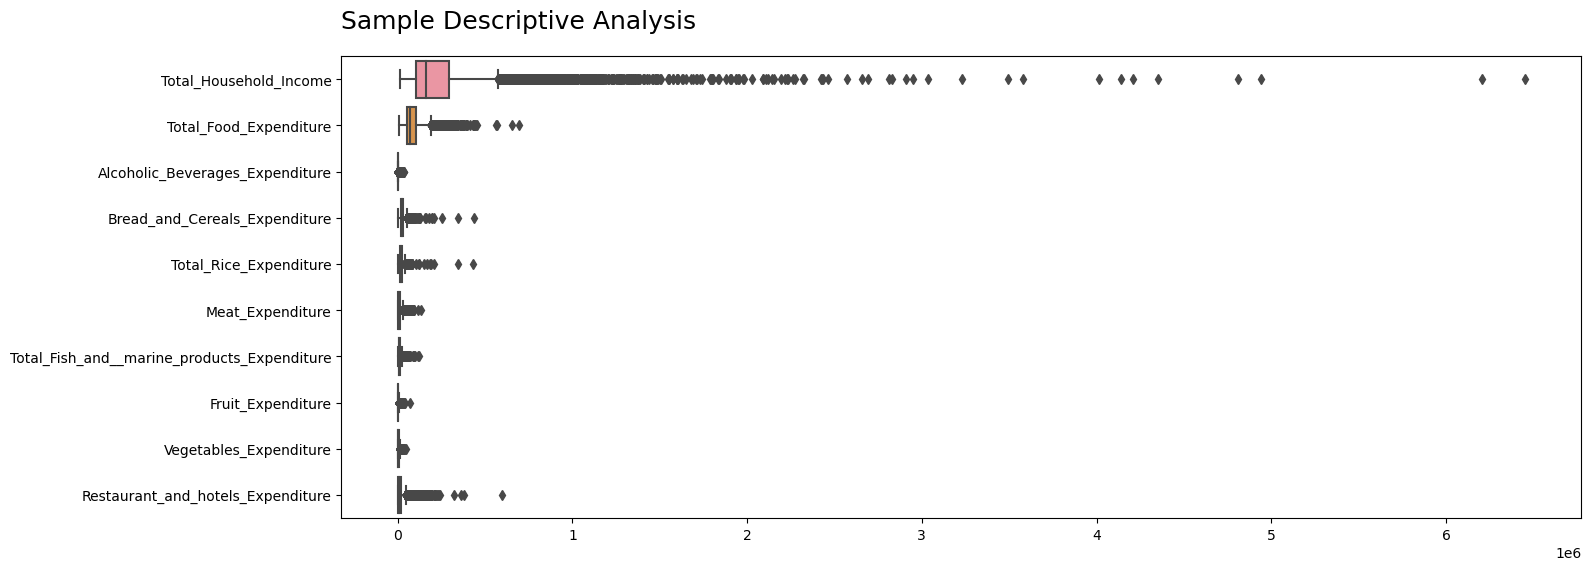

In [40]:
plt.figure(figsize=(16,6))
sns.boxplot(data = sample_df[quantitative_features], orient='h')
plt.title('Sample Descriptive Analysis', fontsize=18, pad=20, loc='left');

Podemos observar que as amostras possuem um alto nível de outliers, faremos a mesma análise retirando estes dados

In [41]:
iqr = sample_df[quantitative_features].quantile(0.75) - sample_df[quantitative_features].quantile(0.25)
iqr

Total_Household_Income                         187601.0
Total_Food_Expenditure                          54827.0
Alcoholic_Beverages_Expenditure                  1300.0
Bread_and_Cereals_Expenditure                   14846.0
Total_Rice_Expenditure                          12850.0
Meat_Expenditure                                11096.0
Total_Fish_and__marine_products_Expenditure      7900.0
Fruit_Expenditure                                2105.0
Vegetables_Expenditure                           3402.0
Restaurant_and_hotels_Expenditure               18060.0
dtype: float64

In [42]:
iqr.Total_Household_Income

187601.0

In [43]:
df.query(f'Total_Household_Income > {iqr.Total_Household_Income}')

,Total_Household_Income,Region,Total_Food_Expenditure,Main_Source_of_Income,Agricultural_Household_indicator,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products_Expenditure,Fruit_Expenditure,...,Number_of_Refrigerator/Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,"Number_of_Car,_Jeep,_Van",Number_of_Landline/wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven/Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
6,198621,CAR,104644,Wage/Salaries,0,40992,36312,12968,12310,2565,...,0,0,0,0,0,2,0,0,0,1
9,625753,CAR,158721,Enterpreneurial Activities,0,56003,43239,26488,25678,3880,...,1,0,0,1,0,4,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41521,267330,XII - SOCCSKSARGEN,71609,Other sources of Income,2,22668,17370,5085,12217,4804,...,0,0,0,0,0,2,0,0,0,0
41522,299856,XII - SOCCSKSARGEN,92326,Wage/Salaries,2,24887,21336,3181,8003,1240,...,1,0,0,0,0,3,0,0,0,0
41523,252448,XII - SOCCSKSARGEN,91590,Other sources of Income,2,27537,23820,7760,9823,6721,...,1,1,0,0,1,4,1,0,0,0
41531,257600,XII - SOCCSKSARGEN,127422,Wage/Salaries,2,35120,27327,5273,11487,6372,...,1,0,1,0,0,2,1,1,0,1


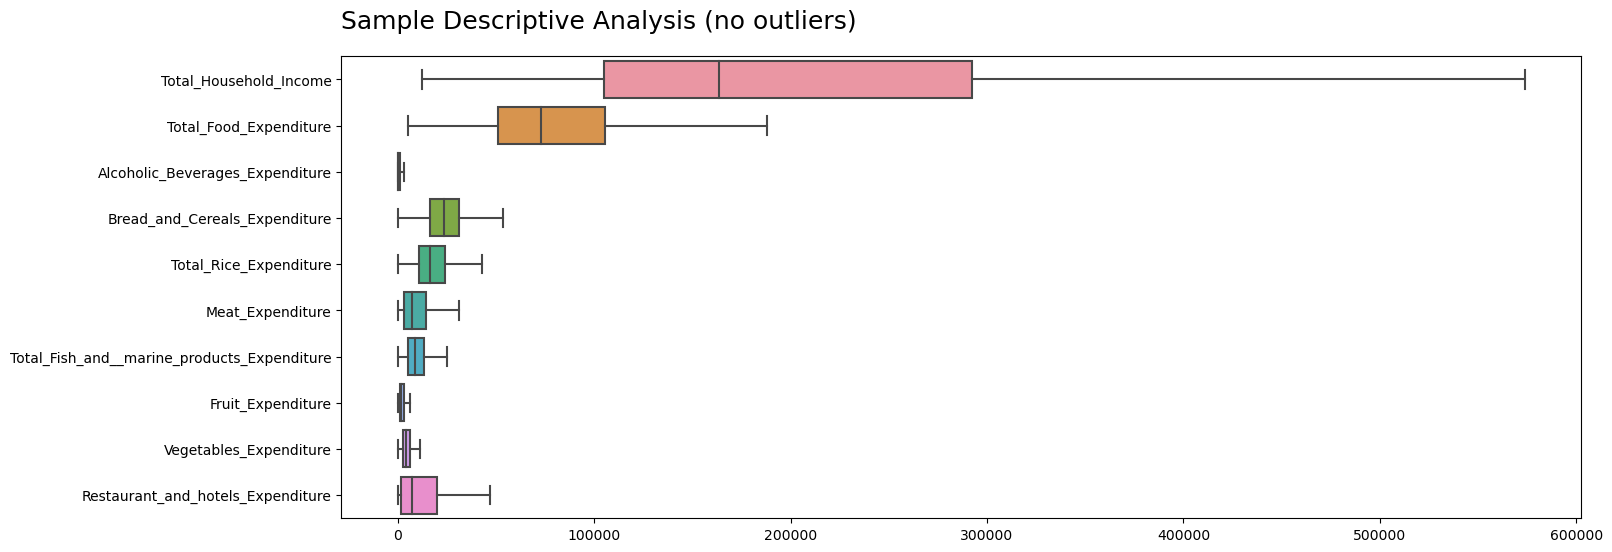

In [44]:
plt.figure(figsize=(16,6))
sns.boxplot(data = sample_df[quantitative_features], orient='h', showfliers=False)
plt.title('Sample Descriptive Analysis (no outliers)', fontsize=18, pad=20, loc='left');

# <font color=Gold>Milestone 2

## <font color='orange'>Tarefa 1</font>
Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).  

In [193]:
df[['Medical_Care_Expenditure','Education_Expenditure']].describe().T

,count,mean,std,min,25%,50%,75%,max
Medical_Care_Expenditure,41544.0,7160.230936,26902.002275,0.0,300.0,1125.0,4680.0,1049275.0
Education_Expenditure,41544.0,7473.500481,21219.170907,0.0,0.0,880.0,4060.0,731000.0


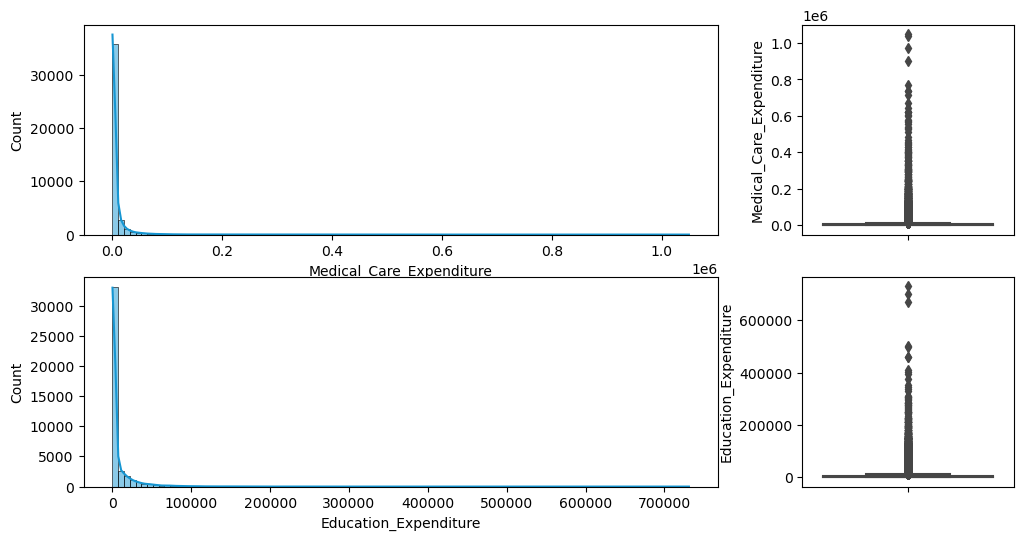

In [150]:
fig, axes = plt.subplots(2,2, figsize=(12,6), gridspec_kw={'width_ratios': [3, 1]})

sns.histplot(df.Medical_Care_Expenditure, bins=100, kde=True, ax=axes[0,0])
sns.histplot(df.Education_Expenditure, bins=100, kde=True, ax=axes[1,0])
sns.boxplot(y=df.Medical_Care_Expenditure, ax=axes[0,1])
sns.boxplot(y=df.Education_Expenditure, ax=axes[1,1]);

In [194]:
bp = plt.boxplot(df['Medical_Care_Expenditure'])
mce_outliers = [item.get_ydata() for item in bp["fliers"]][0]
bp = plt.boxplot(df['Education_Expenditure'])
ee_outliers = [item.get_ydata() for item in bp["fliers"]][0]
plt.close()

print(f'Porcentagem que representa os outliers de Medical_Care_Expenditure:\
 {round(mce_outliers.size / df.Medical_Care_Expenditure.shape[0] * 100, 2)} %')
print(f'Porcentagem que representa os outliers de Education_Expenditure:\
 {round(ee_outliers.size / df.Education_Expenditure.shape[0] * 100, 2)} %')

Porcentagem que representa os outliers de Medical_Care_Expenditure: 13.03 %
Porcentagem que representa os outliers de Education_Expenditure: 17.37 %


Ambas features possuem um alto nível de outliers, iremos remover junto com valores = 0 para seguir com a análise

In [212]:
mce = remove_outliers(df.Medical_Care_Expenditure[df.Medical_Care_Expenditure>0])
ee = remove_outliers(df.Education_Expenditure[df.Education_Expenditure>0])

# alternative
# df.Medical_Care_Expenditure[~df.Medical_Care_Expenditure.isin(mce_outliers)]

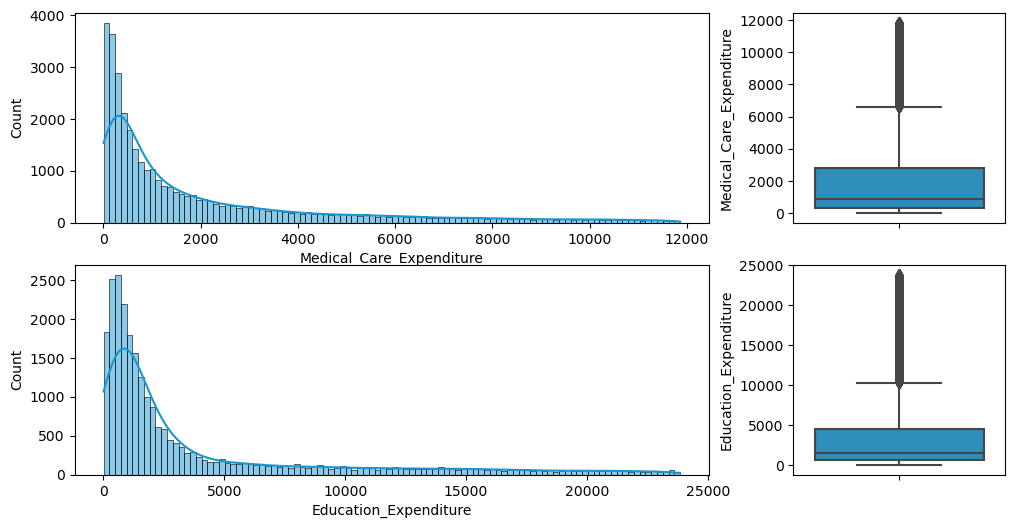

In [213]:
fig, axes = plt.subplots(2,2, figsize=(12,6), gridspec_kw={'width_ratios': [3, 1]})

sns.histplot(mce, bins=100, kde=True, ax=axes[0,0])
sns.histplot(ee, bins=100, kde=True, ax=axes[1,0])
sns.boxplot(y=mce, ax=axes[0,1])
sns.boxplot(y=ee, ax=axes[1,1]);

In [214]:
def calculate_ci(data, n=30, conf_level=0.95):
    
    sigma = data.std() #desvio padrão populacional
    sig_level = 1 - conf_level
    z_alpha_2 = norm.ppf(conf_level + (sig_level / 2))
    error = z_alpha_2 * (sigma / np.sqrt(n))
    sample_mean = data.sample(n, random_state=101).mean()

    a, b = norm.interval(conf_level, loc=sample_mean, scale=sigma / np.sqrt(n))

    print(f'Média Amostral: {round(sample_mean,2)}; Erro: {round(error,2)}')
    print(f'Intervalo de confiança {int(conf_level*100)}% para {data.name}\n({round(a,2)} , {round(b,2)})')

In [215]:
calculate_ci(df.Medical_Care_Expenditure)
print('Cálculo sem outliers:')
calculate_ci(mce)

Média Amostral: 6644.1; Erro: 9626.58
Intervalo de confiança 95% para Medical_Care_Expenditure
(-2982.48 , 16270.68)
Cálculo sem outliers:
Média Amostral: 1991.93; Erro: 937.64
Intervalo de confiança 95% para Medical_Care_Expenditure
(1054.29 , 2929.57)


In [216]:
calculate_ci(df.Education_Expenditure)
print('Cálculo sem outliers:')
calculate_ci(ee)

Média Amostral: 5634.47; Erro: 7593.04
Intervalo de confiança 95% para Education_Expenditure
(-1958.58 , 13227.51)
Cálculo sem outliers:
Média Amostral: 4334.6; Erro: 1956.35
Intervalo de confiança 95% para Education_Expenditure
(2378.25 , 6290.95)


## <font color='orange'>Tarefa 2</font>
Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.  

In [229]:
df.groupby('Household_Head_Sex')['Total_Number_of_Family_members'].describe().T

,count,mean,std,min,25%,50%,75%,max
Household_Head_Sex,,,,,,,,
Female,9061.0,3.864916,2.240325,1.0,2.0,4.0,5.0,20.0
Male,32483.0,4.850045,2.244633,1.0,3.0,5.0,6.0,26.0


### Formulação do Teste de Hipótese:

$\mu_1$ : média do número total de membros da família por chefe do sexo masculino  
$\mu_1$ : média do número total de membros da família por chefe do sexo feminino  

$H_0: \mu_1 - \mu_2  \geq 0$

$H_1: \mu_1 - \mu_2 < 0$


### Selecionando a amostra

In [282]:
# amostra = 1% dos dados
n = round(df.shape[0] * 0.01)
male_householder = df.query('Household_Head_Sex == "Male"')['Total_Number_of_Family_members'].sample(n)
female_householder = df.query('Household_Head_Sex == "Female"')['Total_Number_of_Family_members'].sample(n)

### Calculando o valor Z

In [285]:
D0 = 0
alpha = 0.05
conf_level = 1 - alpha
# numero da amostra
n1 = len(male_householder)
n2 = len(female_householder)

# media amostral
x1 = male_householder.mean()
x2 = female_householder.mean()

# desvio padrão amostral
sigma1 = male_householder.std()
sigma2 = female_householder.std()

# calculo do test Z
numerador = (x1 - x2) - D0
denominador = np.sqrt((sigma1 **2 / n1) + (sigma2**2 / n2))
z = numerador / denominador
print(f'Valor crítico z = {z}')
z_alpha = norm.ppf(conf_level)
print(f'Valor z_alpha para confiança 95% = {z_alpha}')
p_value = norm.sf(z)
print(f'P_value = {p_value}')

Valor crítico z = 5.65468511236033
Valor z_alpha para confiança 95% = 1.6448536269514722
P_value = 7.80661229271043e-09


In [353]:
male_test = DescrStatsW(male_householder)
female_test = DescrStatsW(female_householder)
test = CompareMeans(male_test, female_test)
test.ztest_ind(alternative='larger', value=D0)

(5.654685112360321, 7.806612292710857e-09)

### <font color='DodgerBlue'>Conclusão</font>  

Rejeitar $H_0$ se $z \geq z_{\alpha}$  
Rejeitar $H_0$ se o valor $p\leq\alpha$  

In [286]:
print(f'Z > Z_alpha : {z >= z_alpha}') 
print(f'P_value < Alpha: {p_value <= alpha}') 

Z > Z_alpha : True
P_value < Alpha: True


<font size=4>Conforme os testes realizados, rejeitamos $H_0$ e concluimos que há uma diferença entre a média de número total de membros da família pelo sexo do chefe de família.</font>

## <font color='orange'>Tarefa 3</font>
Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).  

*Considere “Enteroreneurial activities” e “other sources of income” como "outros".*

### Tratando os dados

In [323]:
df[['Total_Household_Income','Main_Source_of_Income']]

,Total_Household_Income,Main_Source_of_Income
0,480332,Wage/Salaries
1,198235,Wage/Salaries
2,82785,Wage/Salaries
3,107589,Wage/Salaries
4,189322,Wage/Salaries
...,...,...
41539,119773,Enterpreneurial Activities
41540,137320,Enterpreneurial Activities
41541,133171,Enterpreneurial Activities
41542,129500,Enterpreneurial Activities


In [335]:
income = df[['Total_Household_Income','Main_Source_of_Income']].copy()
income['Main_Source_of_Income'].value_counts()

Wage/Salaries                 20388
Other sources of Income       10836
Enterpreneurial Activities    10320
Name: Main_Source_of_Income, dtype: int64

In [336]:
income.replace({
    'Other sources of Income': 'Others',
    'Enterpreneurial Activities': 'Others'
}, inplace=True)
income['Main_Source_of_Income'].value_counts()

Others           21156
Wage/Salaries    20388
Name: Main_Source_of_Income, dtype: int64

In [338]:
income.groupby('Main_Source_of_Income')['Total_Household_Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Main_Source_of_Income,,,,,,,,
Others,21156.0,228417.147476,315347.438379,11285.0,93166.0,144612.0,256270.25,11815988.0
Wage/Salaries,20388.0,267414.952080,252468.952984,18004.0,120047.0,185386.0,325645.50,6071030.0


### Formulação do Teste de Hipótese

$\mu_1$ : média do número total da renda da familia pela fonte salarial **Wage/Salaries**  
$\mu_1$ : média do número total da renda da familia pela fonte salarial **Others**  

$H_0: \mu_1 - \mu_2  = 0$

$H_1: \mu_1 - \mu_2 \neq 0$


### Selecionando a amostra

In [341]:
# amostra = 1% dos dados
n = round(income.shape[0] * 0.01)
salaries = income.query('Main_Source_of_Income == "Wage/Salaries"')['Total_Household_Income'].sample(n)
others = income.query('Main_Source_of_Income == "Others"')['Total_Household_Income'].sample(n)

### Calculando o valor T

In [348]:
D0 = 0
# significancia
alpha = 0.05
# confiança
beta = 1 - alpha
# numero da amostra
n1 = len(salaries)
n2 = len(others)

# media amostral
x1 = salaries.mean()
x2 = others.mean()

# desvio padrão amostral
sigma1 = salaries.std()
sigma2 = others.std()

# calculo do test T
numerador = (x1 - x2) - D0
denominador = np.sqrt((sigma1 **2 / n1) + (sigma2**2 / n2))
t = numerador / denominador
print(f'Valor crítico t = {t}')
gl = n1 + n2 - 2
t_alpha = t_student.ppf(beta + alpha/2, df=gl)
print(f'Valor t_alpha para confiança 95% = {t_alpha}')
p_value = norm.sf(t)
print(f'P_value = {p_value*2}')

Valor crítico t = 0.7010088962467642
Valor t_alpha para confiança 95% = 1.9628331678442097
P_value = 0.4832974633418846


In [346]:
salaries_test = DescrStatsW(salaries)
others_test = DescrStatsW(others)
test = CompareMeans(salaries_test, others_test)
test.ztest_ind(alternative='two-sided', value=D0)

(0.7010088962467642, 0.4832974633418846)

### <font color='DodgerBlue'>Conclusão</font>  

Rejeitar $H_0$ se $t \geq t_{\alpha}$  
Rejeitar $H_0$ se o valor $p\leq\alpha$  

In [358]:
print(f'T > t_alpha : {t >= t_alpha}') 
print(f'P_value < alpha: {p_value <= alpha}') 

T > t_alpha : False
P_value < alpha: False


<font size=4>Conforme os testes realizados, aceitamos $H_0$ e concluimos que não há uma diferença de média total de renda da família de acordo com a fonte salarial.</font>

# <font color=Gold>Milestone 3

Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.  

### Tratamento dos Dados

In [523]:
df.select_dtypes(include=['int64']).filter(regex=("Income")).columns

Index(['Total_Household_Income', 'Total_Income_from_Entrepreneurial_Acitivites'], dtype='object')

A renda está dividida em dois grupos, um que provem dos salários, e outro de atividades empresariais. Iremos criar uma coluna a mais com a soma desses valores.

In [524]:
df['Total_Income'] = df['Total_Household_Income'] + df['Total_Income_from_Entrepreneurial_Acitivites']

### Análisa Exploratória

#### Verificando os tipos dos dados

In [425]:
df.dtypes.value_counts()

int64     45
object    15
dtype: int64

In [447]:
df.describe(include=['category']).T

,count,unique,top,freq
Region,34008,17,IVA - CALABARZON,3238
Main_Source_of_Income,34008,3,Wage/Salaries,17749
Household_Head_Sex,34008,2,Male,28646
Household_Head_Marital_Status,34008,6,Married,27493
Household_Head_Highest_Grade_Completed,34008,46,High School Graduate,8129
Household_Head_Job_or_Business_Indicator,34008,1,With Job/Business,34008
Household_Head_Occupation,34008,378,Farmhands and laborers,3478
Household_Head_Class_of_Worker,34008,7,Self-employed wihout any employee,13766
Type_of_Household,34008,3,Single Family,24334
Type_of_Building/House,34008,6,Single house,32028


In [427]:
# create mapper to convert object into category type
mapper = {key:'category' for key in df.select_dtypes(include=['object']).columns}
df = df.astype(mapper)
df.dtypes.value_counts()[:5]

int64       45
category     1
category     1
category     1
category     1
dtype: int64

#### Verificando os valores nulos

In [428]:
null_values = df.isnull().sum()
null_values[null_values > 0]

Household_Head_Occupation         7536
Household_Head_Class_of_Worker    7536
dtype: int64

In [440]:
print('Porcentagem de NaNs para Household_Head_Occupation:',
      f'{100 - round(df.Household_Head_Occupation.count() / df.shape[0]*100, 2)} %')
print('Porcentagem de NaNs para Household_Head_Class_of_Worker:',
      f'{100 - round(df.Household_Head_Class_of_Worker.count() / df.shape[0]*100, 2)} %')

Porcentagem de NaNs para Household_Head_Occupation: 18.14 %
Porcentagem de NaNs para Household_Head_Class_of_Worker: 18.14 %


In [444]:
df[df.isnull()].dropna(how='all')

,Total_Household_Income,Region,Total_Food_Expenditure,Main_Source_of_Income,Agricultural_Household_indicator,Bread_and_Cereals_Expenditure,Total_Rice_Expenditure,Meat_Expenditure,Total_Fish_and__marine_products_Expenditure,Fruit_Expenditure,...,Number_of_Refrigerator/Freezer,Number_of_Washing_Machine,Number_of_Airconditioner,"Number_of_Car,_Jeep,_Van",Number_of_Landline/wireless_telephones,Number_of_Cellular_phone,Number_of_Personal_Computer,Number_of_Stove_with_Oven/Gas_Range,Number_of_Motorized_Banca,Number_of_Motorcycle/Tricycle


Percebemos que onde consta valor nulo do Dataset, o mesmo está presente em todas as colunas, portanto podemos eliminar estas linhas sem prejudicar nosso modelo.

In [445]:
df.dropna(inplace=True)
df.shape

(34008, 60)

#### Análise descritiva

In [448]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Household_Income,34008.0,239113.922724,287278.065155,11285.0,104391.50,158914.0,274562.50,11815988.0
Total_Food_Expenditure,34008.0,84346.018878,49873.082060,3704.0,51702.00,72598.5,103864.75,791848.0
Agricultural_Household_indicator,34008.0,0.447101,0.667606,0.0,0.00,0.0,1.00,2.0
Bread_and_Cereals_Expenditure,34008.0,25503.228182,12649.874828,0.0,17056.75,23675.0,31756.25,437467.0
Total_Rice_Expenditure,34008.0,18501.867149,11131.565148,0.0,11361.75,17009.0,24254.00,429640.0
Meat_Expenditure,34008.0,10225.389879,10127.682961,0.0,3304.00,7105.5,13820.00,140992.0
Total_Fish_and__marine_products_Expenditure,34008.0,10577.501353,7757.519989,0.0,5595.00,8742.0,13388.25,188208.0
Fruit_Expenditure,34008.0,2479.630528,2604.366209,0.0,1020.00,1790.0,2990.00,82600.0
Vegetables_Expenditure,34008.0,5015.883968,3279.978425,0.0,2905.00,4320.0,6285.00,74800.0
Restaurant_and_hotels_Expenditure,34008.0,15029.149465,23740.257298,0.0,1880.00,7000.0,19216.25,725296.0


In [497]:
_df = df.filter(regex='^Number_of').copy()

In [498]:
_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_bedrooms,34008.0,1.725271,1.079352,0.0,1.0,2.0,2.0,9.0
Number_of_Television,34008.0,0.826394,0.626904,0.0,0.0,1.0,1.0,6.0
Number_of_CD/VCD/DVD,34008.0,0.428752,0.555010,0.0,0.0,0.0,1.0,5.0
Number_of_Component/Stereo_set,34008.0,0.151788,0.377899,0.0,0.0,0.0,0.0,5.0
Number_of_Refrigerator/Freezer,34008.0,0.365796,0.528414,0.0,0.0,0.0,1.0,5.0
Number_of_Washing_Machine,34008.0,0.296313,0.467834,0.0,0.0,0.0,1.0,3.0
Number_of_Airconditioner,34008.0,0.107945,0.410794,0.0,0.0,0.0,0.0,5.0
"Number_of_Car,_Jeep,_Van",34008.0,0.074659,0.336183,0.0,0.0,0.0,0.0,5.0
Number_of_Landline/wireless_telephones,34008.0,0.050076,0.255830,0.0,0.0,0.0,0.0,4.0
Number_of_Cellular_phone,34008.0,1.893878,1.539265,0.0,1.0,2.0,3.0,10.0


In [501]:
print('Número de linhas com todos os valores nulos:',
      _df.loc[(_df==0).all(1)].shape[0]
)

Número de linhas com todos os valores nulos: 654


In [ ]:
"""fig, axes = plt.subplots(4,4, figsize=(16,10))
col_num = 0
for i in range(4):
    for j in range(4):
        sns.histplot(_df.iloc[:,col_num], ax=axes[i,j])
        axes[i,j].set_title(_df.columns[col_num], fontsize=8)
        #axes[i,j].set_axis_off()
        axes[i,j].set_yticklabels('')
        axes[i,j].set_ylabel('')
        axes[i,j].set_xlabel('')
        col_num += 1
        if col_num >= _df.shape[1]: break
axes[i,2].set_axis_off()
axes[i,3].set_axis_off()"""

#### Analisando a variável da predição <span style='color:DodgerBlue'>Total_Income</span>

In [546]:
df.Total_Income.describe()

count    3.400800e+04
mean     2.996077e+05
std      4.024694e+05
min      1.203900e+04
25%      1.303738e+05
50%      2.021070e+05
75%      3.401135e+05
max      1.918740e+07
Name: Total_Income, dtype: float64

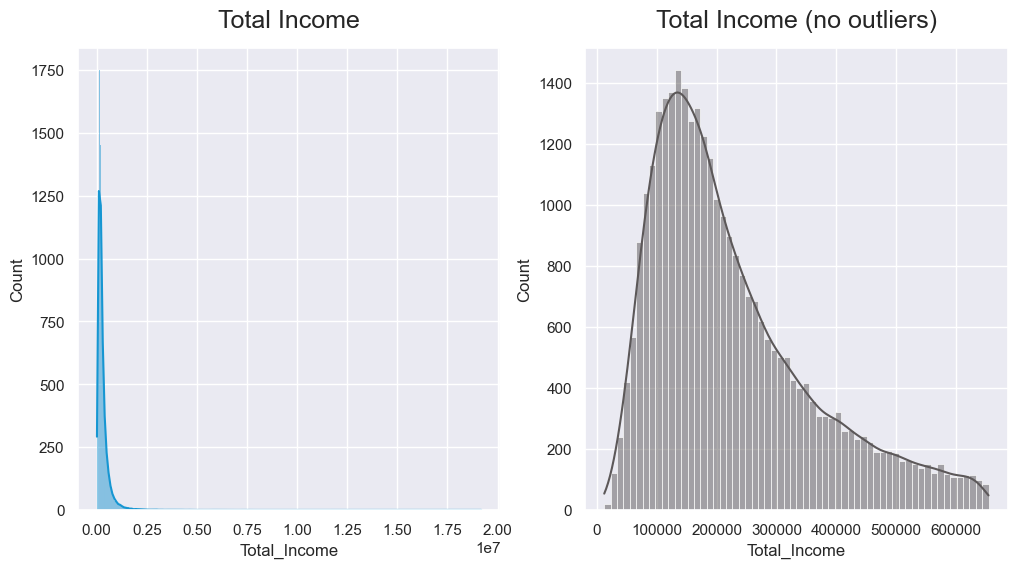

In [548]:
fig, ax = plt.subplots(1,2,figsize=(12,6))
sns.histplot(x=df.Total_Income, 
    kde=True, color=colors['cyan'], ax=ax[0])
ax[0].set_title('Total Income', fontsize=18, pad=15)
sns.histplot(x=remove_outliers(df.Total_Income), 
    kde=True, color=colors['gray'], ax=ax[1])
ax[1].set_title('Total Income (no outliers)', fontsize=18, pad=15);

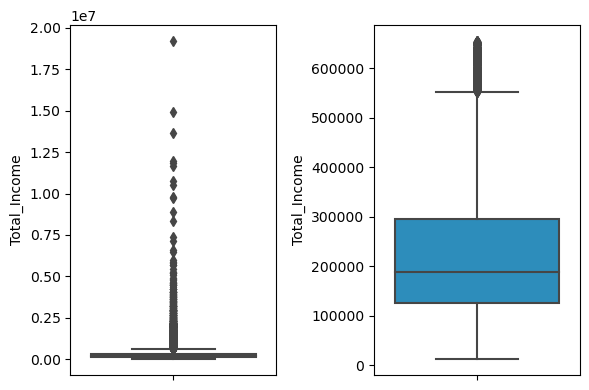

In [541]:
fig, axes = plt.subplots(1,2, figsize=(6,4))
sns.boxplot(y=df.Total_Income, ax=axes[0])
sns.boxplot(y=remove_outliers(df.Total_Income), ax=axes[1])
fig.tight_layout()

A variável possuei um alto range de outliers, levaremos em conta na hora de montar o modelo.